In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import scipy.stats as stats

This file is to plot the tuning curve for each neuron and do analysis of variance (ANOVA) to each neuron. 

In [8]:
f2= open("input_spike_294.pickle",'rb')
input_spike = pickle.load(f2)
f2.close()

f3= open("target_label_294.pickle",'rb')
out_direction = pickle.load(f3)
f3.close()

In [9]:
ind = 8

In [10]:
input_spike = np.sum(input_spike,axis = 2)

In [11]:
input_ind = input_spike[:,ind]

In [12]:
dir0 = np.where(out_direction==0)[0]
box_0 = input_ind[dir0]
print(box_0)

[4 2 1 2 4 2 4 6 2 1 1 1 0 1 5 6 3 3 3 3 1 0 0 4 0 1 4 1 0 1 0 2 0 8 4 1 0
 2 2 1 4 4 0 0 0 0 0 0 1]


In [13]:
dir1 = np.where(out_direction==1)[0]
box_1 = input_ind[dir1]
print(box_1)

[3 2 2 1 2 3 1 2 3 4 0 0 2 0 1 4 2 0 2 2 1 0 2 0 2 1 1 1 3 0 3 0 1 1 2 0 0
 0 2 3 2 0 0 2 1 2]


In [14]:
dir2 = np.where(out_direction==2)[0]
box_2 = input_ind[dir2]
print(box_2)

[7 2 2 4 1 4 3 9 6 7 5 6 6 7 1 4 6 6 3 6 4 5 3 2 4 8 4 1 4 1 3 7 6 4 4 8 5
 6 3 4 2 3 5 2 7 2 7 4 3 1]


In [15]:
dir3 = np.where(out_direction==3)[0]
box_3 = input_ind[dir3]
print(box_3)

[11  8 10  8  4  6 10  7  6  8  7  9  7  7 11  8  8  6  8  7 11  9 10  8
  6  7  7 10  9  7  9 10  5  6  9  2  4  3  9  6  9  7  7  5  8  2  7  3
  8  5  8  5  6  9]


In [16]:
dir4 = np.where(out_direction==4)[0]
box_4 = input_ind[dir4]
print(box_4)

[ 9  4  9  9  8  7  8  8  9 11 12  9  8 11 10  6 12  8 13 10  7 10  9  5
  6  8  9  7  6  8  6  6  5  9  8  7  8  8  8  4  4  6  9  6  5  7  6 10
  7  8  5  5  8  4]


In [17]:
dir5 = np.where(out_direction==5)[0]
box_5 = input_ind[dir5]
print(box_5)

[ 9 10  9  9  8  7  7 10  5  7  7  6  6  7  9  6  6  3  4  5  9  4  4  5
  4  1  6  5  5  6  5  6  3  3  4  5  3  6  5  3  3]


Plot the tuning curve for the neuron ind. 

In [18]:
labels = '0','1','2','3','4','5'

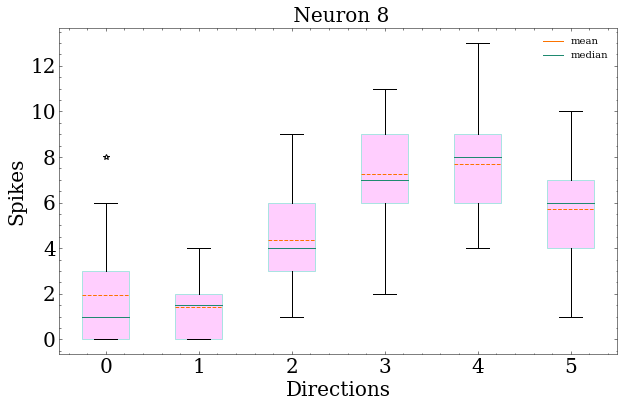

In [19]:
with plt.style.context(['science','no-latex']):
    fig, ax = plt.subplots(figsize = (10,6))

    box_plot = ax.boxplot([box_0,box_1,box_2,box_3,box_4,box_5],labels = labels,sym ='*',showmeans = True,meanline = True,
                         patch_artist = True,boxprops = {'color':'#AAE3E2','facecolor':'#FFCEFE'},
                         medianprops = {'color':'#1F8A70'},meanprops = {'color':'#FC7300'})
    
    
    ax.set_title(f' Neuron {ind}',fontsize = 20)
    ax.set_xlabel('Directions',fontsize = 20)
    ax.set_ylabel('Spikes',fontsize=20)
    
    ax.plot([], [], '-', linewidth=1, color='#FC7300', label='mean')
    ax.plot([], [], '-', linewidth=1, color='#1F8A70', label='median')
    ax.legend()
    
    ax.tick_params(axis='y',labelsize = 20)
    ax.tick_params(axis='x',labelsize = 20)
    # fig.savefig('Neuron44.eps',format='eps')

Compute the F_statistic value for neuron ind. The higher the F_statistic value, there exists more difference between the firing rates for different directions

In [20]:
(W,p) = stats.levene(box_0,box_1,box_2,box_3,box_4,box_5)

In [21]:
F_statistic, pVal = stats.f_oneway(box_0,box_1,box_2,box_3,box_4,box_5)

In [22]:
print(F_statistic)

87.70630827805769


In [23]:
print(pVal)

8.42320061936047e-56


In [24]:
print(p)

0.05429699698047449


### Statistics of F_selective values. 

In [25]:
F_values = []

In [26]:
all_neurons = np.arange(71)

In [27]:
for ind in all_neurons:
    input_ind = input_spike[:,ind]
    
    dir0 = np.where(out_direction==0)[0]
    box_0 = input_ind[dir0]
    
    dir1 = np.where(out_direction==1)[0]
    box_1 = input_ind[dir1]
    
    dir2 = np.where(out_direction==2)[0]
    box_2 = input_ind[dir2]
    
    dir3 = np.where(out_direction==3)[0]
    box_3 = input_ind[dir3]
    
    dir4 = np.where(out_direction==4)[0]
    box_4 = input_ind[dir4]
    
    dir5 = np.where(out_direction==5)[0]
    box_5 = input_ind[dir5]
    
    F_statistic, pVal = stats.f_oneway(box_0,box_1,box_2,box_3,box_4,box_5)
    F_values.append(F_statistic)

In [28]:
print(F_values)

[16.63111879259825, 9.92827841627134, 2.7865859052437325, 3.8047144988512946, 3.541140689205393, 17.018985942917105, 12.770445975523414, 3.908000305538196, 87.70630827805769, 29.924900948487437, 79.78786240083774, 17.162627980130726, 27.039075764780048, 35.706781724995025, 29.086767687047, 1.7584956734432788, 0.9719867630655568, 1.880595113730215, 2.093588954566328, 10.048355069667725, 4.3413829154412475, 36.49353559300967, 27.158916451489162, 1.727973322654467, 1.5734823149665207, 3.214666890008031, 17.242718399875482, 6.487975938109394, 2.551992635708355, 3.6522503206660777, 34.014579268531676, 5.421521841194667, 16.932541172807774, 19.85194898654627, 24.752274985658598, 9.22738575189922, 3.003881532984815, 1.2347148235859735, 118.9172626329216, 5.679845559832287, 120.35693183731077, 19.241228003303515, 83.0586222709674, 1.296153017883454, 147.67197669995522, 1.4860846244585204, 2.4892483356261175, 2.5568607522939173, 25.87406356309272, 17.73365130015815, 17.583983509077978, 3.356859

In [50]:
F_values = np.array(F_values)

In [51]:
# high3 = [38,44, 64]
high3 = [38,64]

In [52]:
F_high3 = F_values[high3]

In [53]:
select7 = np.array([8,10,11,41,68])

In [54]:
F_sele7 = F_values[select7]

In [55]:
useless = np.array([0,1,2,3,4,5,6,7,15,16,17,18,19,20,23,25,28,33,36,37,43,45,46,47,48,49,50,51,52,53,54,55,56,58,59,60,61,62,65,66,69,70])

In [56]:
F_useless = F_values[useless]

In [57]:
exclude = np.concatenate([high3,select7,useless,[40]])
print(exclude)

[38 64  8 10 11 41 68  0  1  2  3  4  5  6  7 15 16 17 18 19 20 23 25 28
 33 36 37 43 45 46 47 48 49 50 51 52 53 54 55 56 58 59 60 61 62 65 66 69
 70 40]


In [58]:
others = np.delete(all_neurons,exclude)
print(others)

[ 9 12 13 14 21 22 24 26 27 29 30 31 32 34 35 39 42 44 57 63 67]


In [59]:
F_others = F_values[others]

bar plot

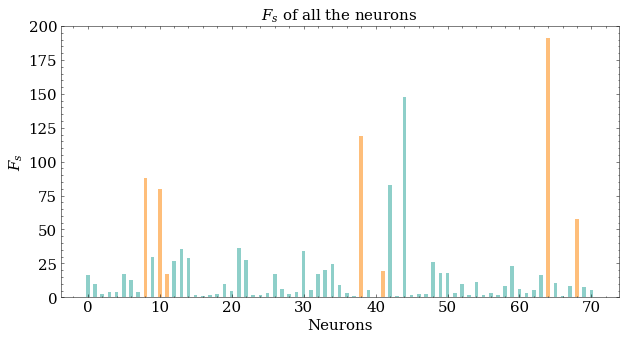

In [62]:
F_values = np.array(F_values)
with plt.style.context(['science','no-latex']):
    fig, ax = plt.subplots(figsize = (10,5))
    # ax.bar(high3,F_high3 , width = 0.5,color='#FA7F6F')
    # ax.bar(select7, F_sele7, width = 0.5,color='#FEBE7A')
    # ax.bar(others, F_others, width = 0.5,color='#8ECFC9')
    # ax.bar(useless, F_useless, width = 0.5,color='#999999')
    ax.bar(high3,F_high3 , width = 0.5,color='#FEBE7A')
    ax.bar(select7, F_sele7, width = 0.5,color='#FEBE7A')
    ax.bar(others, F_others, width = 0.5,color='#8ECFC9')
    ax.bar(useless, F_useless, width = 0.5,color='#8ECFC9')
    ax.set_title(f'$F_s$ of all the neurons',fontsize = 15)
    ax.set_xlabel('Neurons',fontsize = 15)
    ax.set_ylabel('$F_s$',fontsize=15)
    ax.tick_params(axis='y',labelsize = 15)
    ax.tick_params(axis='x',labelsize = 15)
    # fig.savefig('Fsneurons.eps')